#  Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Data Dictionary

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

**LOADING THE DATASET**

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [325]:
data =pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [326]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [327]:
data.shape

(550068, 10)

* Columns : 10
* Rows: 550068

**Descriptive Statistics**

In [328]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [330]:
features = data.columns.values
for f in features :
    print(f,': ',data[f].unique())
    print()

User_ID :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Product_ID :  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Gender :  ['F' 'M']

Age :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Occupation :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

City_Category :  ['A' 'C' 'B']

Stay_In_Current_City_Years :  ['2' '4+' '3' '1' '0']

Marital_Status :  [0 1]

Product_Category :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Purchase :  [ 8370 15200  1422 ...   135   123   613]



# Checking for Null values

In [331]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- No missing values is the dataset

**converting categorical columns into numeric columns**

In [332]:
data1=data.copy()
data1['Gender'].replace(['M','F'],[0,1], inplace=True)
data1['City_Category']=data1['City_Category'].map({'A': 1, 'B': 2,'C':3})
data1['Stay_In_Current_City_Years'].replace(['0','1','2','3','4+'],[0,1,2,3,5], inplace=True)

In [333]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int64 
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int64 
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 42.0+ MB


## Univariate Analysis

In [334]:
num_cols = data1.select_dtypes('int64').columns.values
cat_cols = data1.select_dtypes('object').columns.values

In [335]:
for i in data.columns:
    print('##############')
    print(data[i].value_counts())

##############
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
##############
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00107842       1
P00156642       1
P00133042       1
P00204442       1
P00143242       1
Name: Product_ID, Length: 3631, dtype: int64
##############
M    414259
F    135809
Name: Gender, dtype: int64
##############
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
##############
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: 

In [336]:
for i in data1.columns:
    print('#####')
    print(i,':',data[i].nunique())

#####
User_ID : 5891
#####
Product_ID : 3631
#####
Gender : 2
#####
Age : 7
#####
Occupation : 21
#####
City_Category : 3
#####
Stay_In_Current_City_Years : 5
#####
Marital_Status : 2
#####
Product_Category : 20
#####
Purchase : 18105


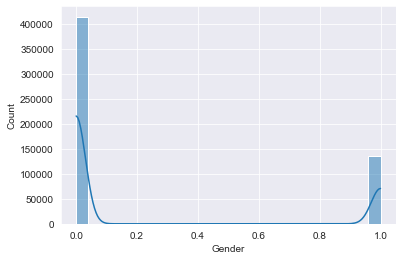

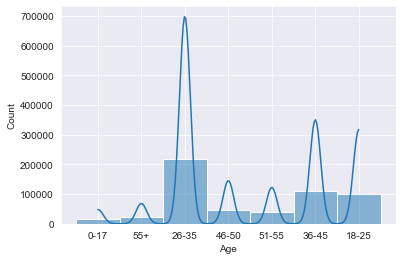

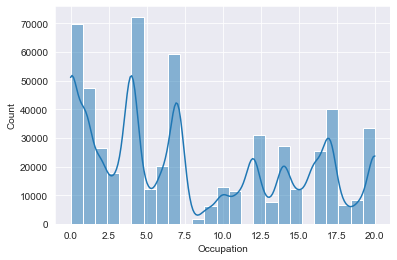

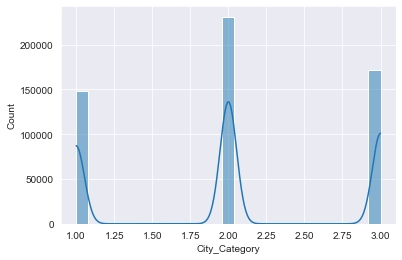

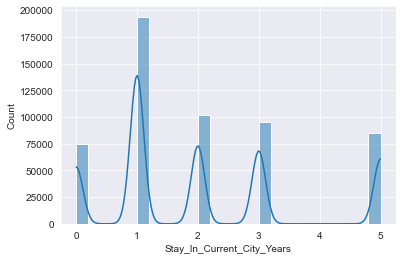

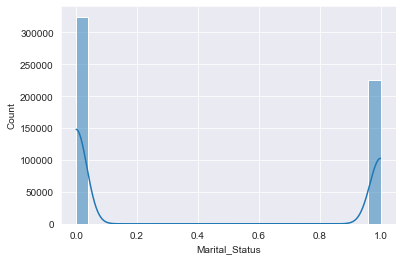

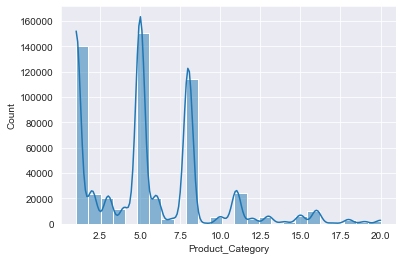

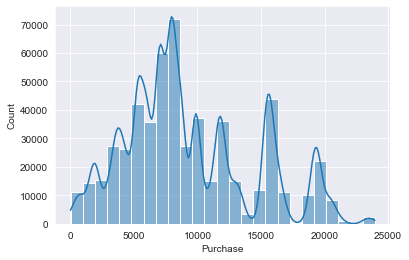

In [337]:
for i in ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase']:
    sns.histplot(data = data1, x = data1[i],bins = 25,kde=True)
    plt.show()

In [338]:
def uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

## Checking For Outliers: (using boxplot)

<Figure size 288x144 with 0 Axes>

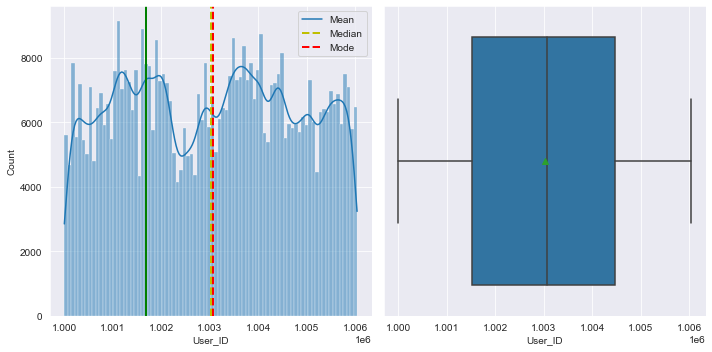

<Figure size 288x144 with 0 Axes>

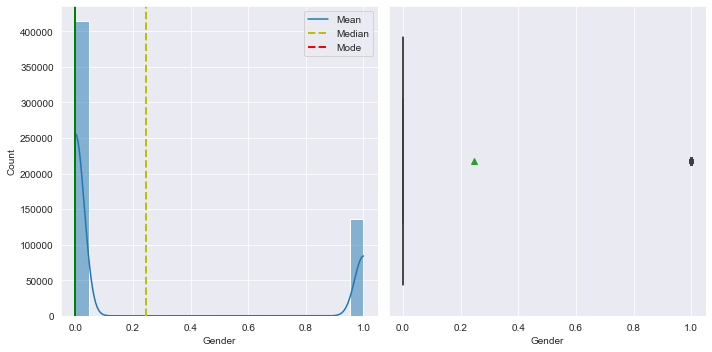

<Figure size 288x144 with 0 Axes>

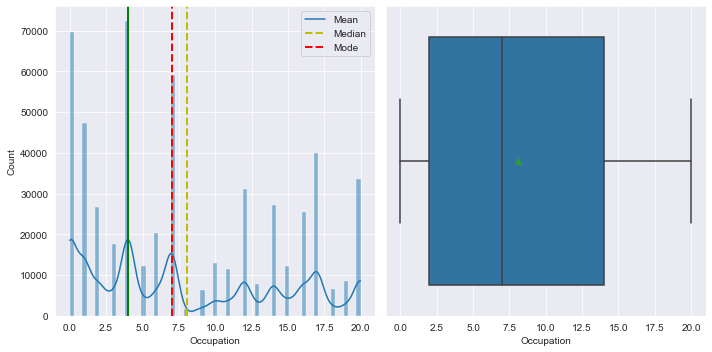

<Figure size 288x144 with 0 Axes>

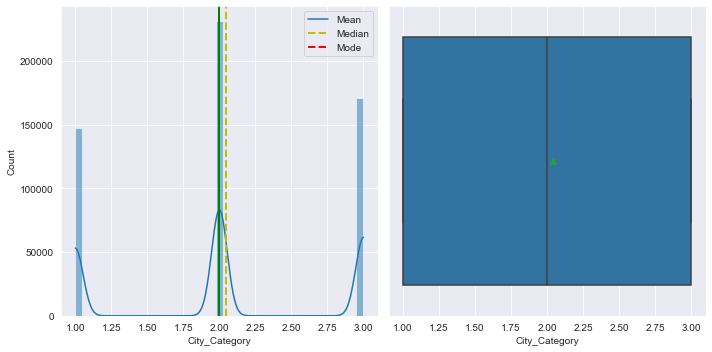

<Figure size 288x144 with 0 Axes>

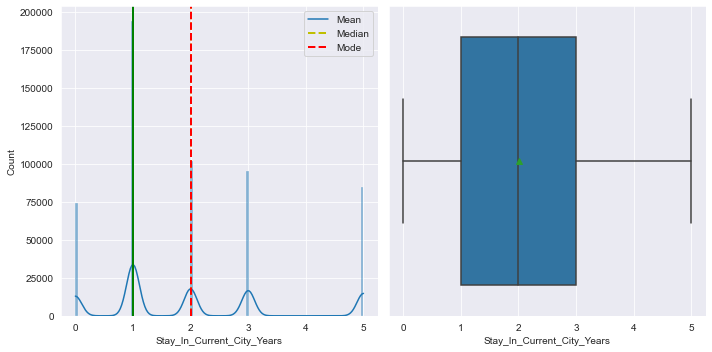

<Figure size 288x144 with 0 Axes>

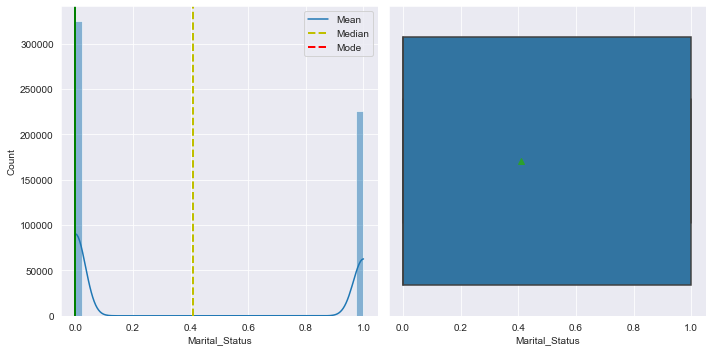

<Figure size 288x144 with 0 Axes>

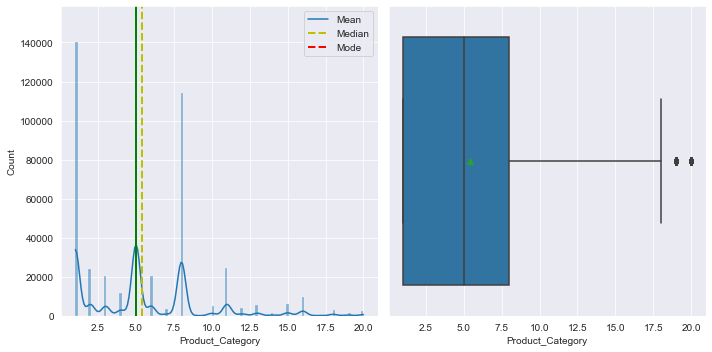

<Figure size 288x144 with 0 Axes>

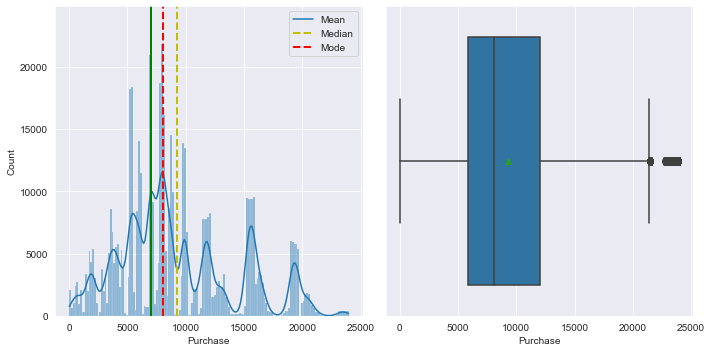

In [339]:
for f in num_cols:
    plt.figure(figsize=[4,2])
    uni(data1[f])
    plt.show()

- Few features Contains Outliers

**how much money each costumer group (grouped by occupation ID) spent.**

In [340]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(data[data['Occupation'] == oid]['Purchase'].sum())

spent_money

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

- explanation for the huge sums of money spent by each occupation is that this data may represent the transactions for multiple Black Friday nights, and not just one.

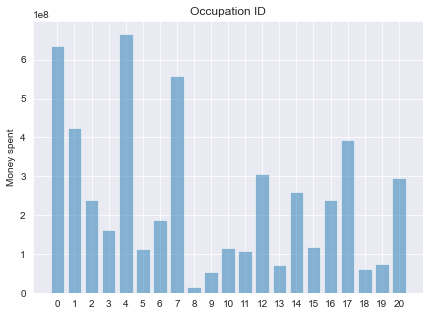

In [341]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))
plt.figure(figsize=[7,5])
plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

- It can be easily observed that people having occupations 0 and 4 spent the most money during Black Friday sales. On the other hand, the people belonging to the occupations with ID 18, 19, and especially occupation 8, have spent the least amount of money. 

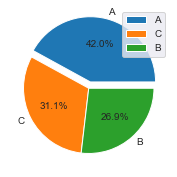

In [342]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(7,3))
ax1.pie(data['City_Category'].value_counts(), explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

- It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere between these three cities, is easily accessible and has good road connections from these cities.

# Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

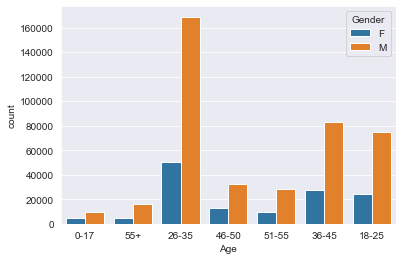

In [343]:
sns.countplot(data['Age'], hue=data['Gender'])

- we can easily conclude that the highest number of customers belong to the age group between 26 and 35, for both genders.
- Younger and older population are far less represented on Black Friday. 


<AxesSubplot:xlabel='City_Category', ylabel='count'>

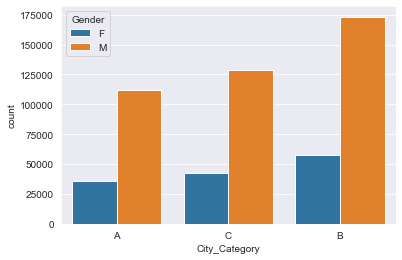

In [344]:
sns.countplot(data['City_Category'], hue=data['Gender'])

- from all the purchases made, Most purchase are from City Category B

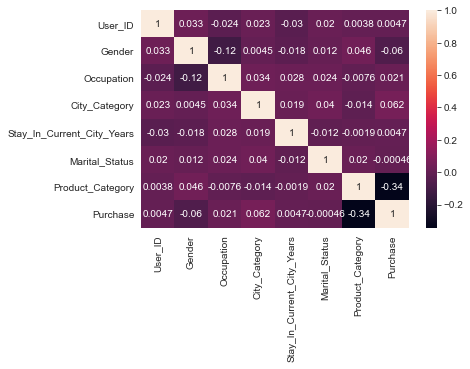

In [345]:
sns.heatmap(data1.corr(),annot=True)
plt.show()

**High -ve Correlation:**
* Product Category & Purchase
* Occupation & Gender

In [346]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("Paired"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("Paired"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

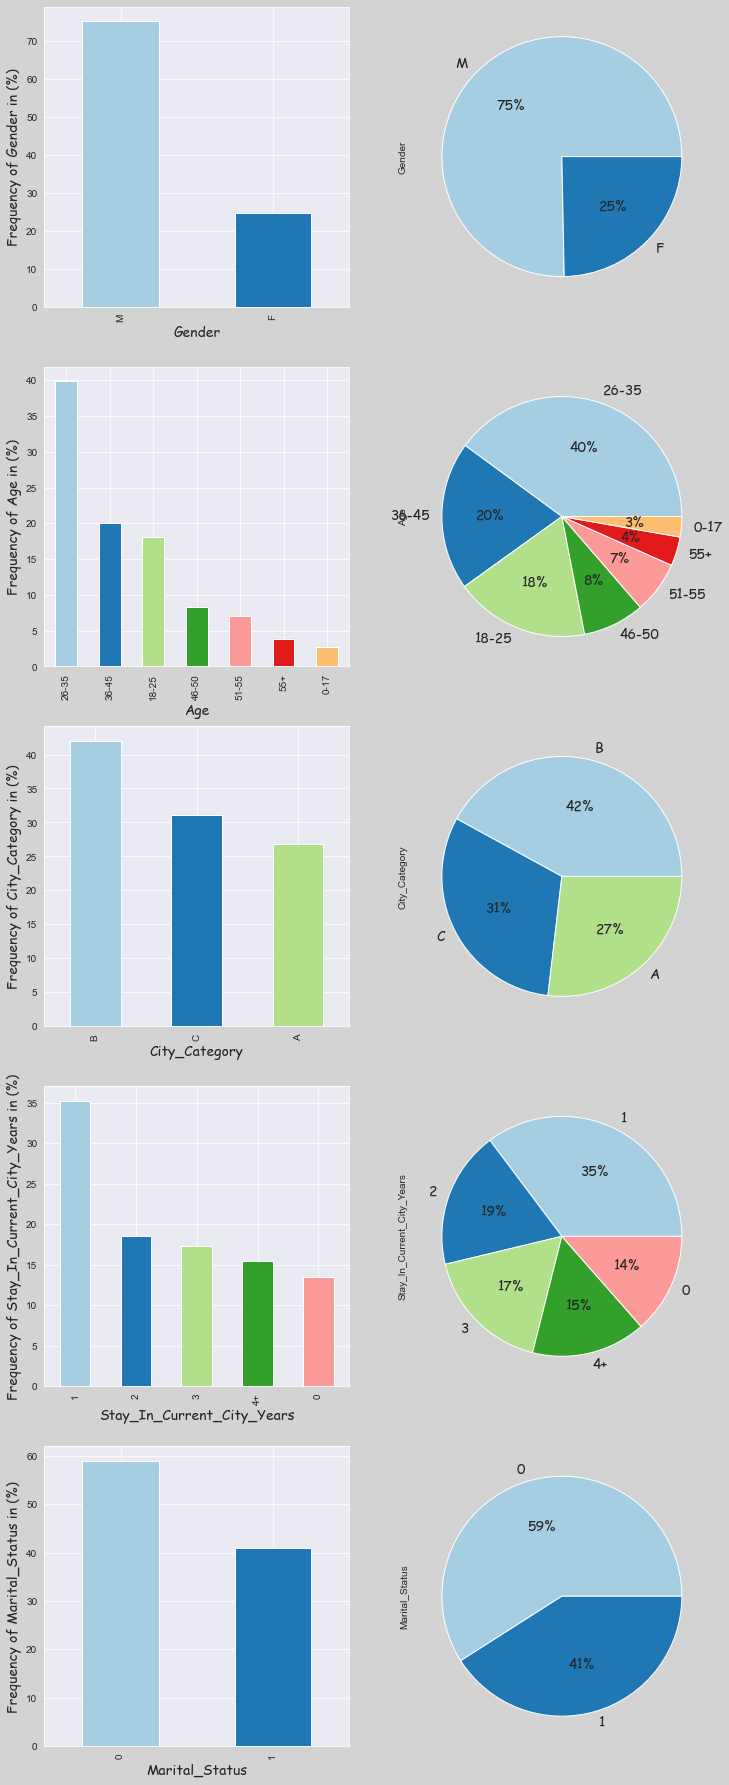

In [347]:
cat_colnames = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
cat_analysis(data,cat_colnames,5,2,12,32)

- Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
- 60% of purchases are made by people between the ages of 26 and 45
- City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.

## Multivariate Analysis

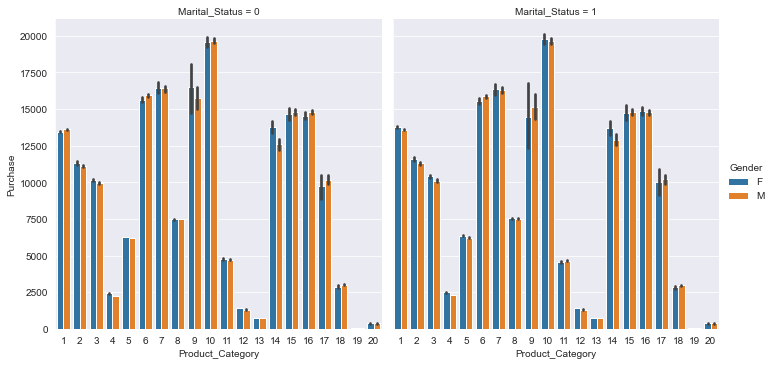

In [348]:
sns.catplot(x='Product_Category',y='Purchase', hue='Gender', col='Marital_Status', data=data,kind='bar')
plt.show()

- Similar trend has been seen in purchase irrespective of marital status
- Product Category 20 is most purchase 
- Product category 19, 20 is least purchase 

## Are women spending more money per transaction than men?

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


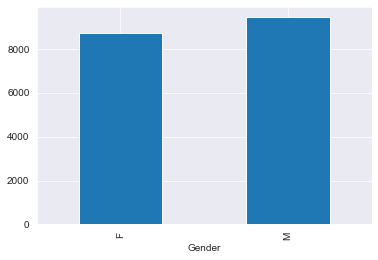

In [349]:
print(data.groupby('Gender').mean()['Purchase'])
data.groupby('Gender').mean()['Purchase'].plot(kind='bar');

- Females spent less than Males

# CONFIDENCE INTERVALS

### Calculate Confidence Interval (CI) - to estimate the mean weight of the expenses by female and male customers.

### CLT Analysis for mean purchase with confidence 95% - Based on Gender
 - Analysis of the true mean of purchase values by gender with a 95% confidence.

In [350]:
data_male=data[data['Gender']=='M']
data_female=data[data['Gender']=='F']

calculating the bootstrapped mean of samples
Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=50
bs_means is a list of 'r' bootstrap sample means

In [351]:
r = 10000
size = 50
bs_means_males = np.empty(r)

for i in range(r):
    bs_sample1 = np.random.choice(data_male['Purchase'], size=size)
    bs_means_males[i] = np.mean(bs_sample1)

In [352]:

r = 10000
size = 50
bs_means_females = np.empty(r)

for i in range(r):
    bs_sample2 = np.random.choice(data_female['Purchase'], size=size)
    bs_means_females[i] = np.mean(bs_sample2)

In [353]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means_males))
print(np.std(bs_means_males))


# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means_females))
print(np.std(bs_means_females))

9425.695122
718.7210920423062
8749.491645999999
671.5140037546281


In [354]:
lower= np.mean(bs_means_males)-2*np.std(bs_means_males)
upper= np.mean(bs_means_males)+2*np.std(bs_means_males)
print("lower value:",lower,'\nupper value:',upper)

lower value: 7988.252937915387 
upper value: 10863.13730608461


In [355]:
lower1= np.mean(bs_means_females)-2*np.std(bs_means_females)
upper1= np.mean(bs_means_females)+2*np.std(bs_means_females)
print("lower value1:",lower,'\nupper value1:',upper)

lower value1: 7988.252937915387 
upper value1: 10863.13730608461


### Inferences
 - Using confidence interval 95%:
 - As the sample size increases, the Male and female groups start to become distinct 
 - With increasing sample size, Standard error of the mean in the samples decreases. For sample size **100000 is 0.47**
 - For male (sample size 100000) range for mean purchase with confidence interval 95% is **[7979.23, 10878.65]**
 - For female range for mean purchase with confidence interval 95% is **[7854.80, 10683.58]**
 - Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

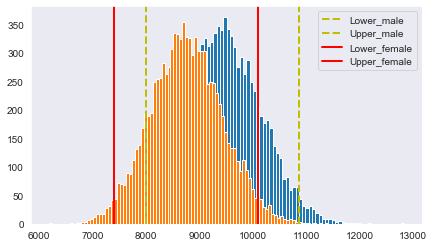

In [356]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7,4])
plt.hist(bs_means_males, bins=100)
plt.hist(bs_means_females, bins=100)
plt.axvline(lower, color='y', linestyle='--',linewidth=2)
plt.axvline(upper, color='y', linestyle='--',linewidth=2)

plt.axvline(lower1, color='r', linestyle='-',linewidth=2)
plt.axvline(upper1, color='r', linestyle='-',linewidth=2)
plt.legend({'Lower_male':lower,'Upper_male':upper,'Lower_female':lower1,'Upper_female':upper1})
plt.grid()
plt.show()

### Calculate Confidence Interval (CI) - to estimate the mean weight of the expenses by married and unmarried customers.¶

### CLT Analysis for mean purchase with confidence 95% - Based on Marital Status
 - Analysis of the true mean of purchase values by marital Status with a 95% confidence.

In [357]:
data_married=data[data['Marital_Status']==1]
data_unmarried=data[data['Marital_Status']==0]

In [358]:
r = 10000
size = 50
bs_means_married = np.empty(r)

for i in range(r):
    bs_sample3 = np.random.choice(data_married['Purchase'], size=size)
    bs_means_married[i] = np.mean(bs_sample3)

In [359]:
r = 10000
size = 50
bs_means_unmarried = np.empty(r)

for i in range(r):
    bs_sample2 = np.random.choice(data_unmarried['Purchase'], size=size)
    bs_means_unmarried[i] = np.mean(bs_sample2)

In [360]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means_unmarried))
print(np.std(bs_means_unmarried))


# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means_married))
print(np.std(bs_means_married))

9257.857888
708.3830126076849
9265.671688
709.6063113083131


In [361]:
lower= np.mean(bs_means_unmarried)-2*np.std(bs_means_unmarried)
upper= np.mean(bs_means_unmarried)+2*np.std(bs_means_unmarried)
print("lower value:",lower,'\nupper value:',upper)

lower value: 7841.09186278463 
upper value: 10674.62391321537


In [362]:
lower1= np.mean(bs_means_married)-2*np.std(bs_means_married)
upper1= np.mean(bs_means_married)+2*np.std(bs_means_married)
print("lower value:",lower1,'\nupper value:',upper1)

lower value: 7846.459065383374 
upper value: 10684.884310616626


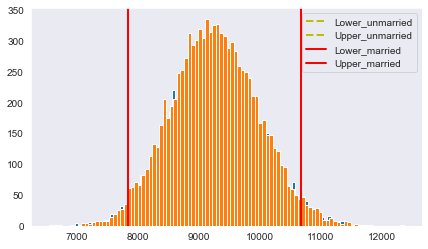

In [363]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7,4])
plt.hist(bs_means_married, bins=100)
plt.hist(bs_means_unmarried, bins=100)
plt.axvline(lower, color='y', linestyle='--',linewidth=2)
plt.axvline(upper, color='y', linestyle='--',linewidth=2)

plt.axvline(lower1, color='r', linestyle='-',linewidth=2)
plt.axvline(upper1, color='r', linestyle='-',linewidth=2)
plt.legend({'Lower_unmarried':lower,'Upper_unmarried':upper,'Lower_married':lower1,'Upper_married':upper1})
plt.grid()
plt.show()

### Inference
- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
- For married customer (sample size 100000) range for mean purchase with confidence interval 95% is **[7870.54, 10655.97]**
- For unmarried customer range for mean purchase with confidence interval 95% is **[7854.80, 10683.58]**

### AGE

In [364]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

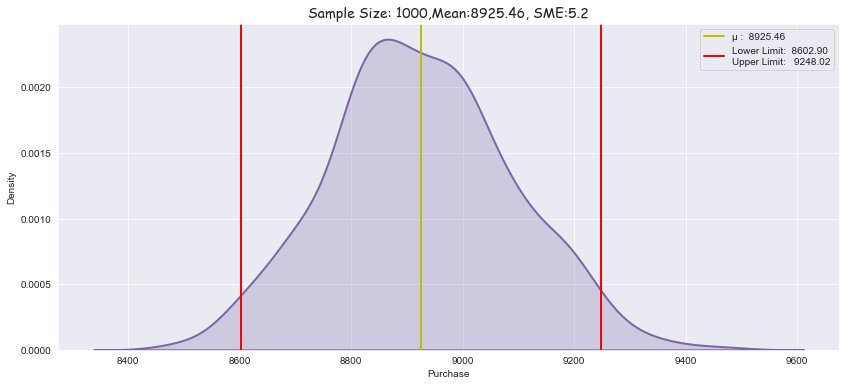

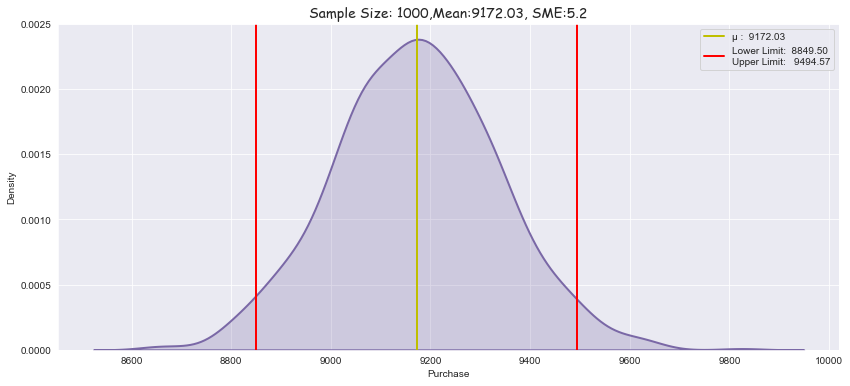

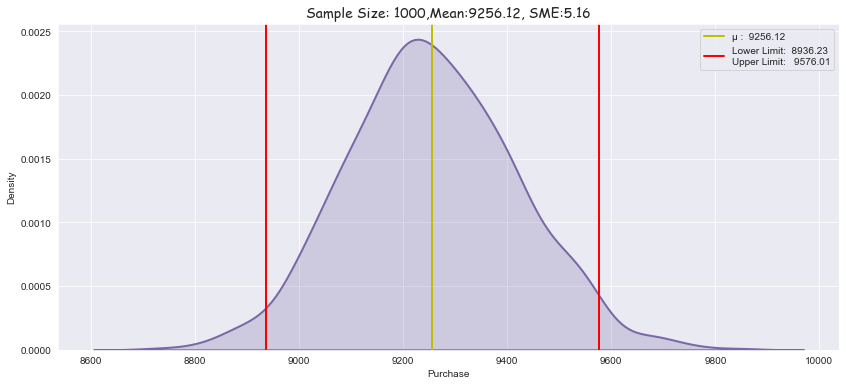

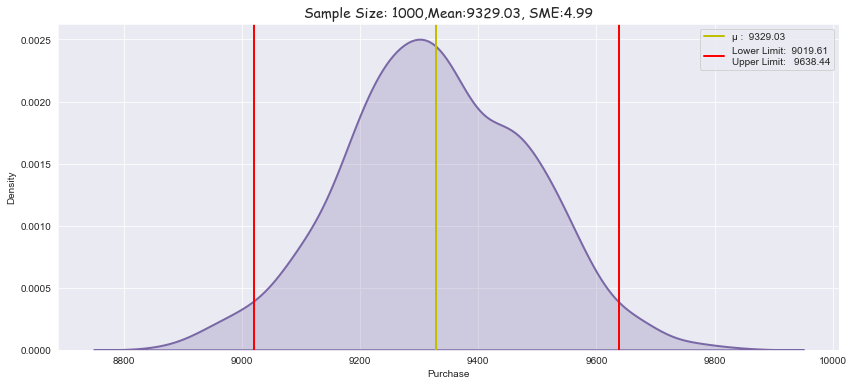

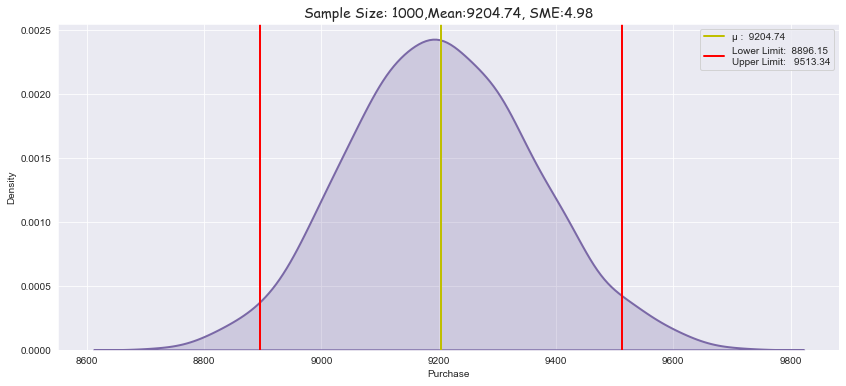

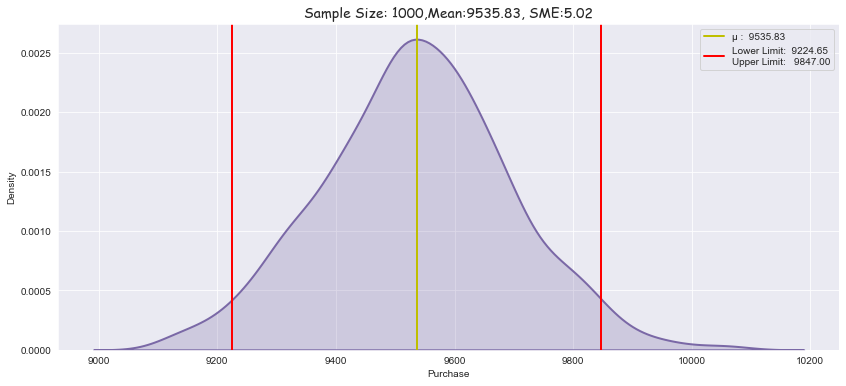

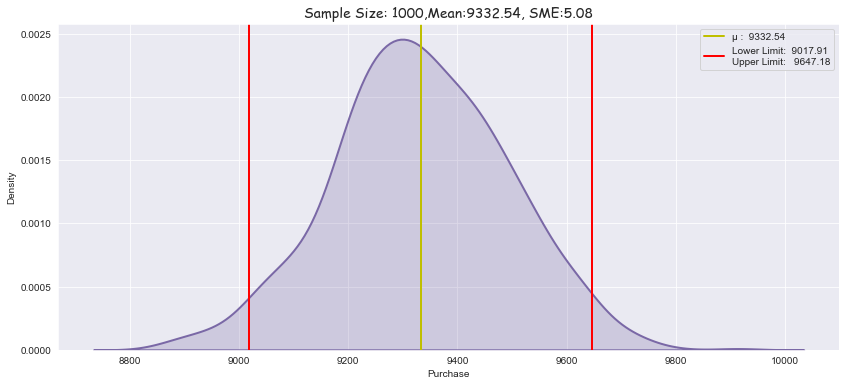

In [365]:
from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics
from scipy.stats import norm


itr_size = 1000
smp_siz = 1000
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(data[data['Age'] == age]['Purchase'],smp_siz,itr_size,ci)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])


### Checking the Sampling distribution of a sample mean for each Age Group

In [366]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

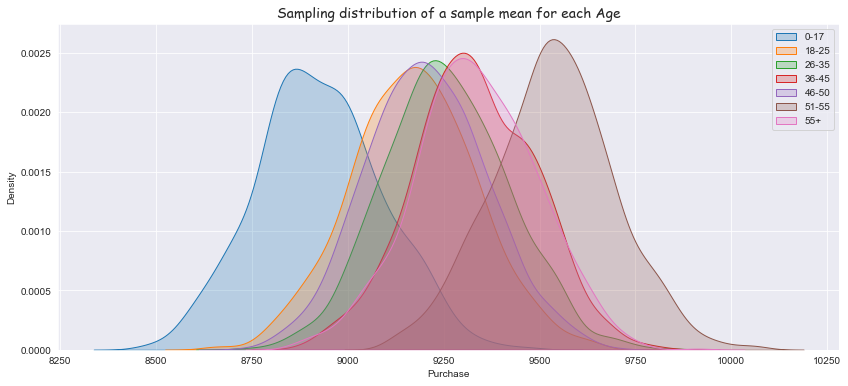

In [367]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age",fontsize=14,family="Comic Sans MS")
plt.xlabel('Purchase')
plt.legend(loc='upper right')

- Spending by Age_group 0-17 is low compared to other age groups.
- Customers in Age_group 51-55 spend the most between [9221.74, 9836.1]

# Insights:
**Based on EDA**
- From this we can conclude that in this specific retail store, during Black Friday, 5,891 different customers have bought something from the store.
- from Product_ID category we can extract information that 3,631 different products are sold.
- **21** different occupation ID's are registered during the shopping day.
- Married & Unmarried folks are spendings shows a simliar pattern
- Younger and older population are far less represented on Black Friday.
- The majority of our customers come from **city category B ** but customers come from **City category C spent more as mean is 9719**.
- The majority of users come from **City Category C, but more people from City Category B tend to purchase**, which suggests the same users visit the mall multiple times in City Category B.
- **Majority of Customers** purchase within the **5,000 - 20,000** range.
- Males clearly purchase more than females. **75%** of men and only **25%** of women purchase products.
- Most mall customers are between the ages of **26 and 35**.**60%** of purchases are made by people between the ages of 26 and 45
- City Category **B accounts for 42%**, City Category **C 31%**, and City Category **A represents 27%** of all customer purchases.Purchases are high in city category C
- Most mall customers are between the ages of **26 and 35**.City category C has more customers between the ages of **18 and 45.**
- In City Category C, there are slightly more female customers.



**Based on CLT & CI**
- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
- For married customer (sample size 100000) range for mean purchase with confidence interval 99% is **[7870.54, 10655.97]**
- For unmarried customer range for mean purchase with confidence interval 90% is **[7854.80, 10683.58]**
- Using confidence interval 95%:
- As the sample size increases, the Male and female groups start to become distinct 
- With increasing sample size, Standard error of the mean in the samples decreases. For sample size **100000 is 0.47**
- For male (sample size 100000) range for mean purchase with confidence interval 95% is **[7979.23, 10878.65]**
- For female range for mean purchase with confidence interval 95% is **[7854.80, 10683.58]**
- Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

# Recommendations:
- Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.
- In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.
- Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
- The management should have some offers on kids (0-17 years) in order to increase sales. 
- In order to attract more young shoppers, they can offer some games for the younger generation.